In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/renewable_energy_consumption_estat_data.csv')

# Sort

filtered_df = df.sort_values(by='country')
filtered_df

,country,year,iso_code,value
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [30]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 179 rows, 4 columns


In [31]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')


There are 37 countries in the dataset
Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia'
 'Euro area – 20 countries (from 2023)'
 'European Union - 27 countries (from 2020)' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo*' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


country     0
year        0
iso_code    0
value       0
dtype: int64

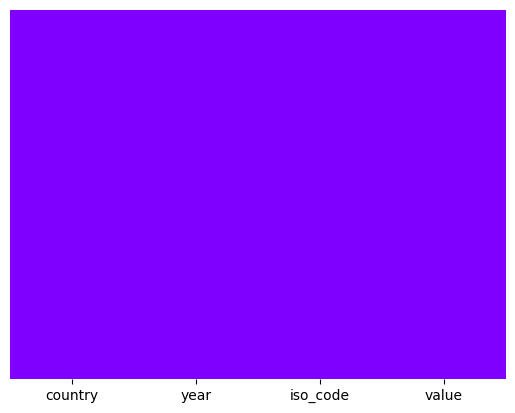

In [16]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [33]:
# Drop 'not countries'
rows_to_drop = ['Euro area – 20 countries (from 2023)', 'European Union - 27 countries (from 2020)']

filtered_df = filtered_df[~filtered_df['country'].isin(rows_to_drop)]
filtered_df

,country,year,iso_code,value
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [18]:

filtered_df.describe()

,year,value
count,171.000000,171.000000
mean,2020.959064,28.667760
std,1.407362,16.547847
min,2019.000000,7.046000
25%,2020.000000,17.382000
50%,2021.000000,22.671000
75%,2022.000000,37.181000
max,2023.000000,83.725000


In [19]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')

There are 35 countries in the dataset
Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Kosovo*' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


In [20]:
# Save file for using for forecast
filtered_df.to_csv('../data_for_forecast/renewable_energy_consumption_esta-clean.csv')
filtered_df

,country,year,iso_code,value
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


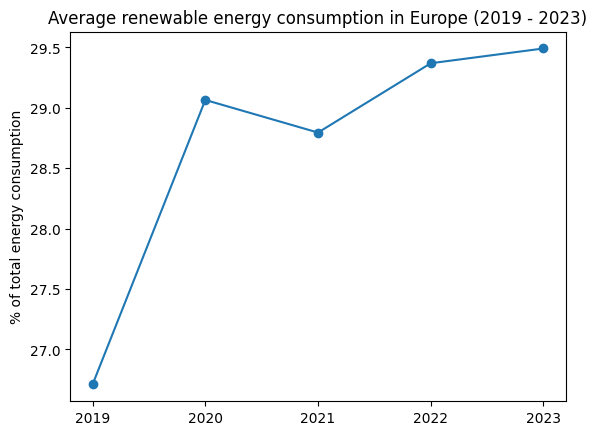

In [35]:
# TREND ANALYSIS OVER TIME - FINAL ENERGY CONSUPMTION OVER THE YEARS

yearly_fec = filtered_df.groupby('year')['value'].mean()
plt.plot(yearly_fec.index, yearly_fec.values, marker='o')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('Average renewable energy consumption in Europe (2019 - 2023)')
plt.ylabel('% of total energy consumption')
plt.show()

                   country      value
15                 Iceland  80.499250
26                  Norway  75.455600
34                  Sweden  62.223200
10                 Finland  45.611000
0                  Albania  43.028400
19                  Latvia  42.420000
23              Montenegro  40.666000
8                  Denmark  39.458600
3   Bosnia and Herzegovina  37.950333
1                  Austria  36.002200


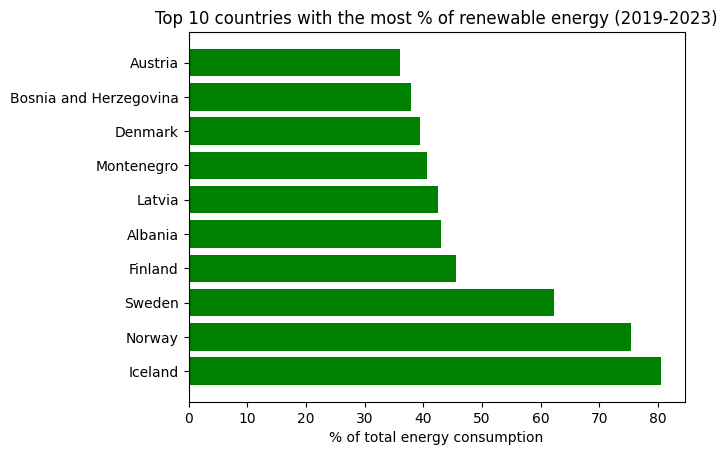

In [37]:
# TOP COUNTRIES WITH THE MOST % OF RENEWABLE ENERGY CONSUMPTION

avg_renewable_energy_consumption = filtered_df.groupby('country')['value'].mean().reset_index()

top_countries = avg_renewable_energy_consumption[['country', 'value']].sort_values(by='value', ascending=False)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['country'][:10], top_countries['value'][:10], color='green')
plt.title('Top 10 countries with the most % of renewable energy (2019-2023)')
plt.xlabel('% of total energy consumption')
plt.show()


           country    value
21      Luxembourg  11.8176
22           Malta  12.1242
2          Belgium  12.9124
24     Netherlands  13.7110
16         Ireland  13.8912
14         Hungary  14.5726
27          Poland  16.0552
31        Slovakia  17.2258
7   Czech Republic  17.5730
6           Cyprus  17.8730


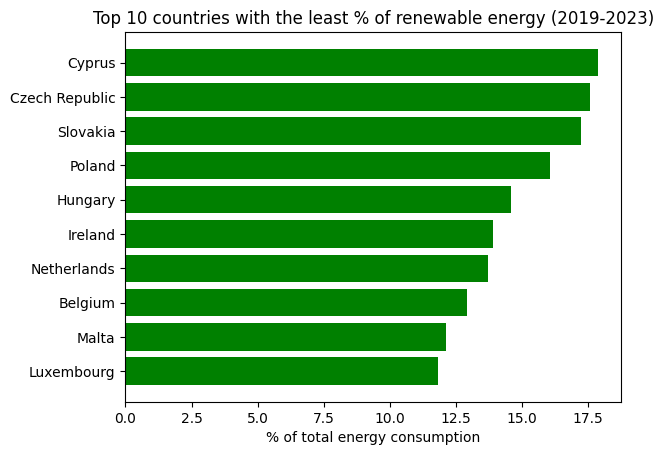

In [41]:
# TOP COUNTRIES WITH THE LEAST % OF RENEWABLE ENERGY CONSUMPTION

avg_renewable_energy_consumption = filtered_df.groupby('country')['value'].mean().reset_index()

top_countries = avg_renewable_energy_consumption[['country', 'value']].sort_values(by='value', ascending=True)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['country'][:10], top_countries['value'][:10], color='green')
plt.title('Top 10 countries with the least % of renewable energy (2019-2023)')
plt.xlabel('% of total energy consumption')
plt.show()



In [7]:
# Renewable energy consumption  - higher % of -> better sustainability 

avg_renewable_energy_consumption = filtered_df.groupby('country')['value'].mean().reset_index()

max_value = avg_renewable_energy_consumption['value'].max()
min_value = avg_renewable_energy_consumption['value'].min()

avg_renewable_energy_consumption['renewable_energy_subindex'] = (avg_renewable_energy_consumption['value'] - min_value)/(max_value - min_value)

avg_renewable_energy_consumption.sort_values(by='renewable_energy_subindex', ascending=False)

,country,value,renewable_energy_subindex
15,Iceland,80.499250,1.000000
26,Norway,75.455600,0.926565
34,Sweden,62.223200,0.733902
10,Finland,45.611000,0.492030
0,Albania,43.028400,0.454427
19,Latvia,42.420000,0.445569
23,Montenegro,40.666000,0.420031
8,Denmark,39.458600,0.402451
3,Bosnia and Herzegovina,37.950333,0.380491
1,Austria,36.002200,0.352126


In [8]:
avg_renewable_energy_consumption.to_csv('../data_subindex/subindex_renewable_energy_consumption_2019-2023.csv')

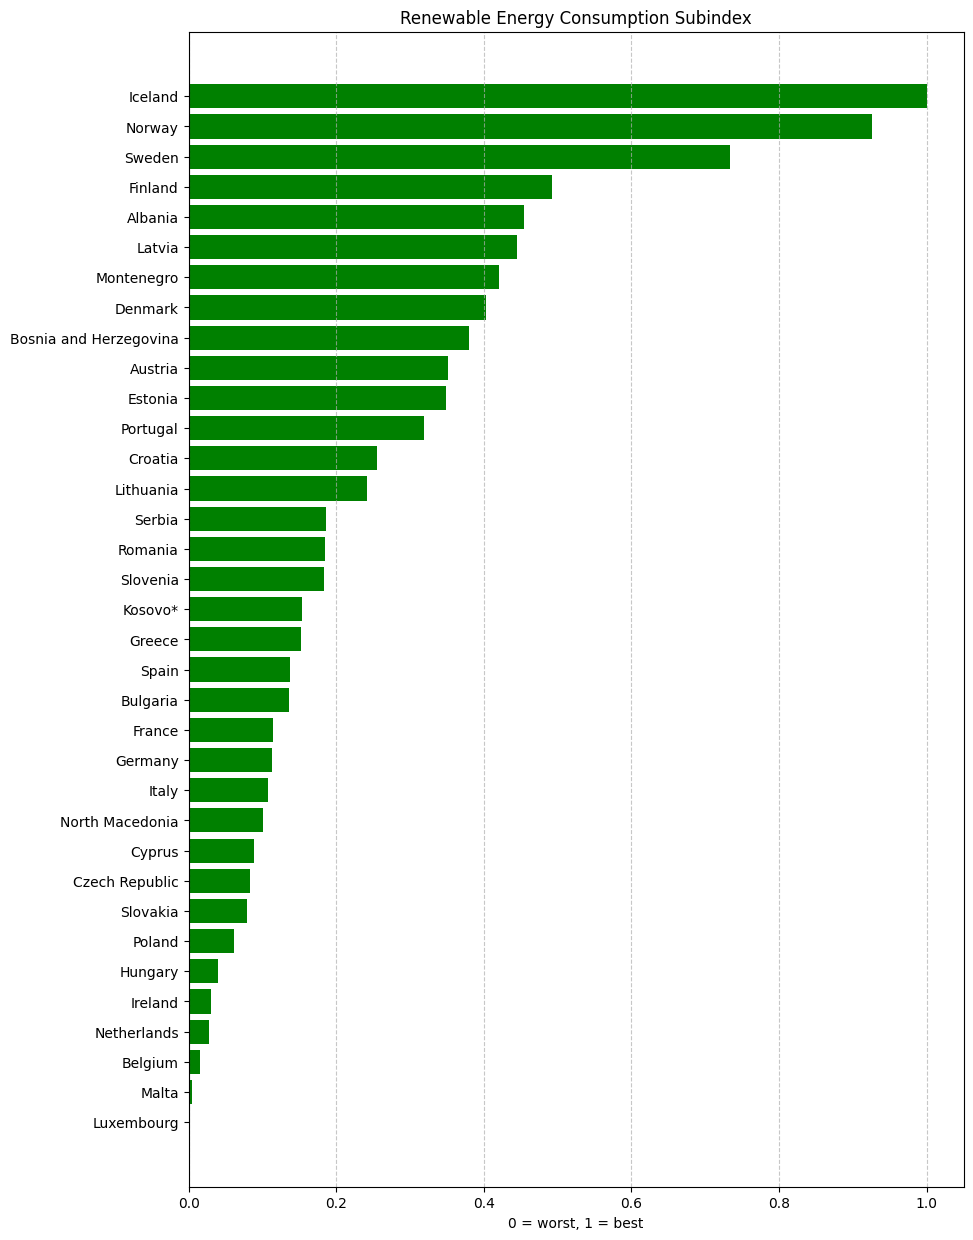

In [101]:
avg_renewable_energy_consumption = avg_renewable_energy_consumption.sort_values(by='renewable_energy_subindex')

plt.figure(figsize=(10,15))
plt.barh(avg_renewable_energy_consumption['country'],avg_renewable_energy_consumption['renewable_energy_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('Renewable energy consumption subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()